In [2]:
# load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as sp

# models

#knn
from sklearn.neighbors import KNeighborsClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#stacking
from sklearn.ensemble import StackingClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression

# helpers

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load Data

In [30]:
raw_data = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

print(raw_data.shape)
print(data_val.shape)

(159256, 24)
(106171, 23)


In [31]:
data_val.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
5,159261,40,165,55,75.8,1.0,1.0,1,1,94,...,146,41,108,15.1,1,1.0,27,15,56,1
6,159262,40,165,80,87.0,1.5,1.5,1,1,128,...,95,46,160,15.5,1,1.0,24,30,25,0
7,159263,55,150,50,69.2,1.0,0.9,1,1,152,...,89,60,98,14.2,1,0.7,26,20,36,0
8,159264,70,160,60,79.0,0.5,0.5,1,1,150,...,116,57,113,13.9,1,1.2,19,24,18,0
9,159265,70,145,55,82.0,1.0,1.0,1,1,144,...,72,49,110,14.5,1,1.0,20,15,27,0


In [4]:
raw_data.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


# EDA

In [5]:
# check for NAs

print(raw_data.isnull().sum())
print(data_val.isnull().sum())

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64
id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL         

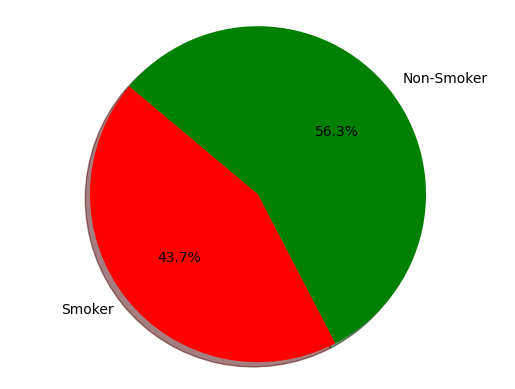

In [6]:
count_smoker = raw_data['smoking'].sum()
count_nonsmoker = raw_data['smoking'].count() - count_smoker

# pie chart 

labels = ['Smoker', 'Non-Smoker']
sizes = [count_smoker, count_nonsmoker]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.show()

The dataset is fairly balanced

smoking
0    45.0
1    40.0
Name: age, dtype: float64


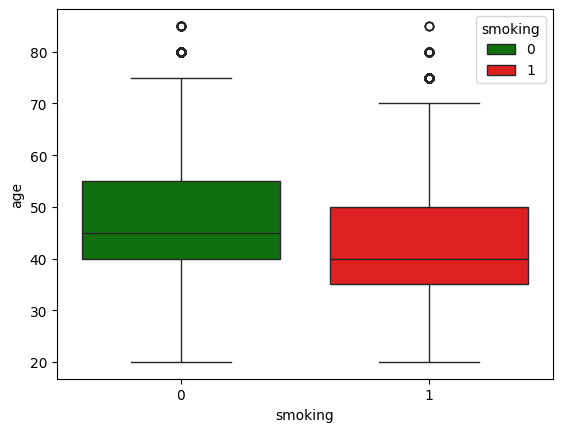

In [7]:
# age vs smoking status
colors = ['green', 'red']
sns.boxplot(x='smoking', y='age', data=raw_data, palette=colors, hue='smoking')

# print median

print(raw_data.groupby('smoking')['age'].median())


The median of smokers is five years less than the median of non-smokers

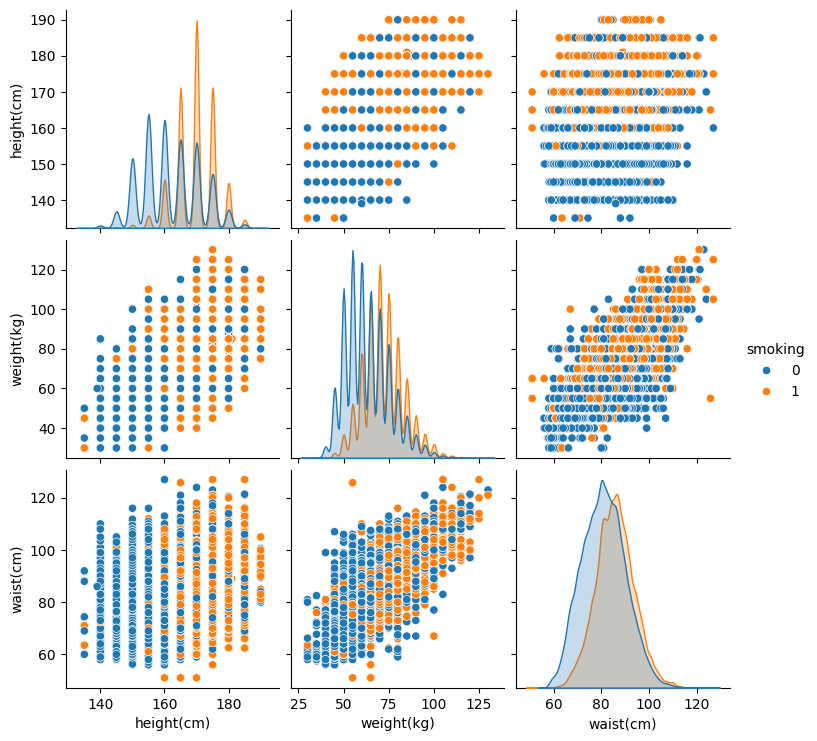

In [8]:
# scatter plot variables against smoking

sns.pairplot(raw_data[['height(cm)', 'weight(kg)', 'waist(cm)', 'smoking']], hue='smoking')

Taller/Heavier people appear to smoke more. The waist measurement does not divide the groups as well.

<Axes: xlabel='smoking', ylabel='relaxation'>

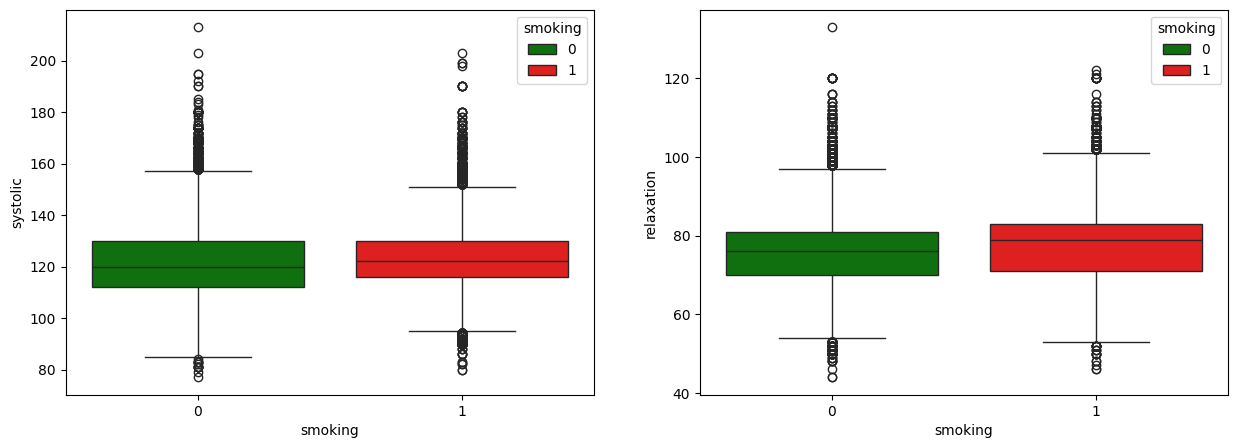

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='smoking', y='systolic', data=raw_data, palette=colors, ax=ax[0], hue='smoking')
sns.boxplot(x='smoking', y='relaxation', data=raw_data, palette=colors, ax=ax[1], hue='smoking')

Nor systolic nor relaxation appear to distinguish the smokers from the non-smokers clearly (similar distributions).

In [10]:
print(raw_data.columns)

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


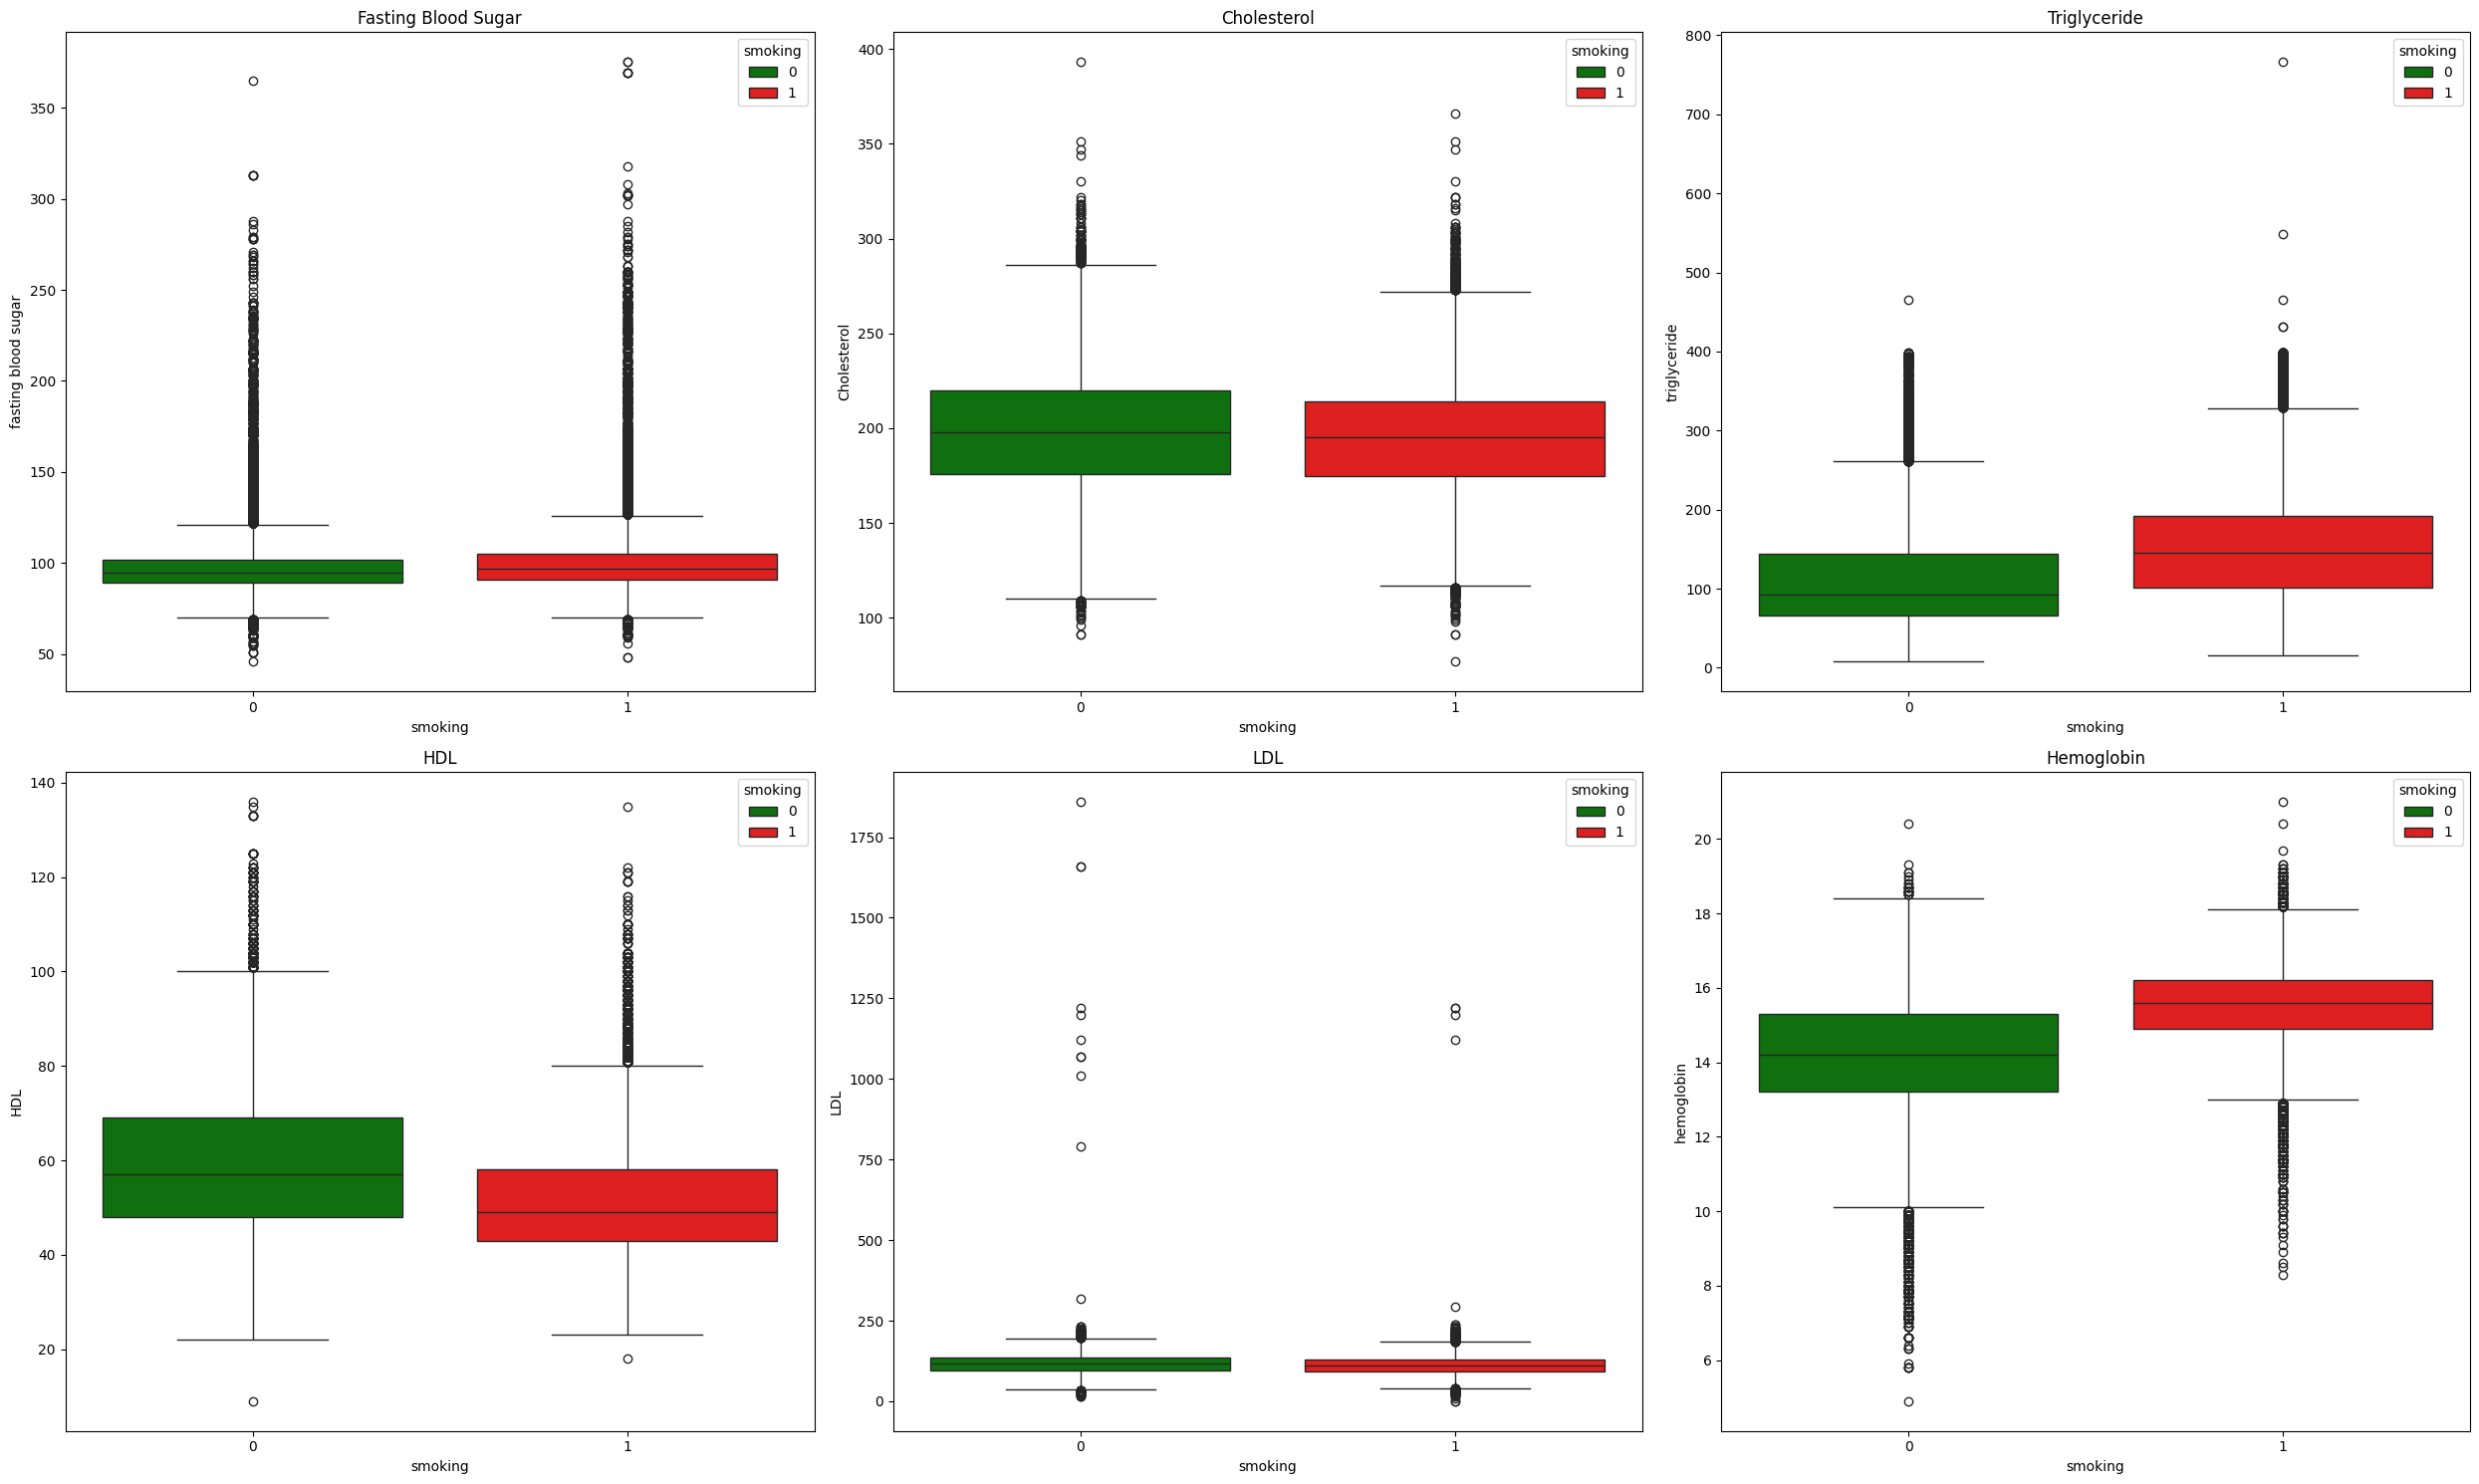

In [11]:
# subplot of boxplots for fasting blood sugar, cholesterol, and triglycerides, hdl and ldl vs smoking

fig, ax = plt.subplots(2, 3, figsize=(25, 15))

ax = ax.flatten()

sns.boxplot(x='smoking', y='fasting blood sugar', data=raw_data, palette=colors, ax=ax[0], hue='smoking')
sns.boxplot(x='smoking', y='Cholesterol', data=raw_data, palette=colors, ax=ax[1], hue='smoking')
sns.boxplot(x='smoking', y='triglyceride', data=raw_data, palette=colors, ax=ax[2], hue='smoking')
sns.boxplot(x='smoking', y='HDL', data=raw_data, palette=colors, ax=ax[3], hue='smoking')
sns.boxplot(x='smoking', y='LDL', data=raw_data, palette=colors, ax=ax[4], hue='smoking')
sns.boxplot(x='smoking', y='hemoglobin', data=raw_data, palette=colors, ax=ax[5], hue='smoking')

ax[0].set_title('Fasting Blood Sugar')
ax[1].set_title('Cholesterol')
ax[2].set_title('Triglyceride')
ax[3].set_title('HDL')
ax[4].set_title('LDL')
ax[5].set_title('Hemoglobin')

plt.tight_layout()


The triglycerides, HDL and Hemoglobin show different distributions for smokers vs non-smokers

In [12]:
# cross tabs

pd.crosstab(raw_data['Urine protein'], raw_data['smoking'])


smoking,0,1
Urine protein,,
1,84311,66551
2,3549,2060
3,1402,826
4,287,190
5,48,26
6,6,0


There are few observations of high urine protein (more than 3) and appear to be mostly from non-smokers.

In [13]:

pd.crosstab(raw_data['serum creatinine'], raw_data['smoking'])

smoking,0,1
serum creatinine,,
0.1,4,13
0.2,3,0
0.3,4,1
0.4,298,13
0.5,2444,180
0.6,10161,992
0.7,15583,4199
0.8,18540,11262
0.9,16637,19139


Text(0.5, 1.0, 'Dental Caries vs Smoking Status')

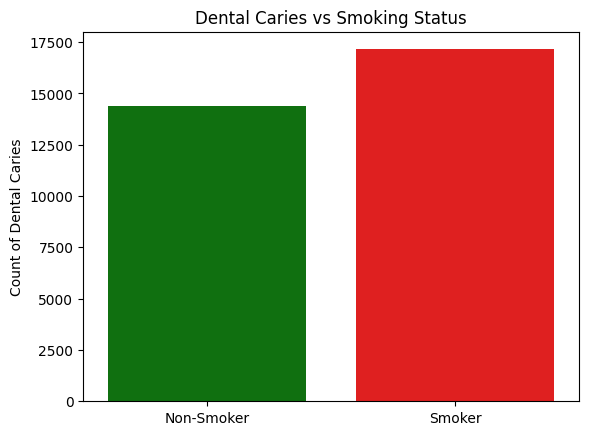

In [14]:
count_smoker_caries = raw_data[raw_data['smoking'] == 1]['dental caries'].sum()
count_nonsmoker_caries = raw_data[raw_data['smoking'] == 0]['dental caries'].sum()

# bar plot

labels = ['Non-Smoker', 'Smoker']
sizes = [count_nonsmoker_caries, count_smoker_caries]
sns.barplot(x=labels, y=sizes, palette=colors, hue=labels)
plt.ylabel('Count of Dental Caries')
plt.title('Dental Caries vs Smoking Status')


Smokers appear to have more dental caries than non-smokers.

# Feature Engineering

In [15]:
raw_data.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [16]:
# drop target variable

y = raw_data['smoking']
data = raw_data.drop('smoking', axis=1)
data = data.drop('id', axis=1)

In [17]:
data.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [18]:
# min and max values of systolic and relaxation

print(data['systolic'].min())
print(data['systolic'].max())
print(data['relaxation'].min())
print(data['relaxation'].max())

77
213
44
133


In [32]:
# create new features

data['bmi'] = data['weight(kg)'] / (data['height(cm)'] / 100) ** 2
data['waist-height ratio'] = data['waist(cm)'] / data['height(cm)']
data['pulse pressure'] = data['systolic'] - data['relaxation']

# blood pressure categories

# source: https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/blood-pressure
def blood_pressure_category(systolic, relaxation):
    if systolic < 120 and relaxation < 80:
        return 0 #optimal
    elif 120 <= systolic < 130 or 80 < relaxation < 85:
        return 1 #normal
    elif 130 <= systolic < 140 or 85 <= relaxation < 90:
        return 2 #high-normal
    elif 140 <= systolic < 180 or 90 <= relaxation:
        return 3 #high
    else:
        return 4 #very high
    
data['blood pressure category'] = data.apply(lambda x: blood_pressure_category(x['systolic'], x['relaxation']), axis=1)

# ratios

data['ldl/hdl ratio'] = data['LDL'] / data['HDL']
data['ast/alt ratio'] = data['AST'] / data['ALT']

# do the same for val

data_val['bmi'] = data_val['weight(kg)'] / (data_val['height(cm)'] / 100) ** 2
data_val['waist-height ratio'] = data_val['waist(cm)'] / data_val['height(cm)']
data_val['pulse pressure'] = data_val['systolic'] - data_val['relaxation']
data_val['blood pressure category'] = data_val.apply(lambda x: blood_pressure_category(x['systolic'], x['relaxation']), axis=1)
data_val['ldl/hdl ratio'] = data_val['LDL'] / data_val['HDL']
data_val['ast/alt ratio'] = data_val['AST'] / data_val['ALT']


In [20]:
# check new features
data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,bmi,waist-height ratio,pulse pressure,blood pressure category,ldl/hdl ratio,ast/alt ratio
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,22,25,27,0,22.038567,0.490909,48,2,1.875000,0.880000
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,27,23,37,1,23.875115,0.539394,63,1,2.210526,1.173913
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,27,31,53,0,25.951557,0.476471,43,0,2.066667,0.870968
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,20,27,30,1,29.320988,0.583333,43,2,2.684211,0.740741
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,19,13,17,0,22.038567,0.487879,45,1,2.113636,1.461538
5,50,170,55,51.0,1.2,1.2,1,1,146,95,...,24,42,119,1,19.031142,0.300000,51,3,3.193548,0.571429
6,45,160,55,69.0,1.5,1.2,1,1,150,88,...,17,12,16,0,21.484375,0.431250,62,2,1.768116,1.416667
7,55,155,60,84.5,0.7,0.9,1,1,137,91,...,16,15,16,0,24.973985,0.545161,46,2,3.882353,1.066667
8,40,165,70,89.0,0.7,1.0,1,1,130,80,...,24,21,31,0,25.711662,0.539394,50,2,2.542373,1.142857
9,40,155,50,73.0,1.5,1.5,1,1,105,70,...,22,16,14,0,20.811655,0.470968,35,0,2.218182,1.375000


In [21]:
data_val.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,bmi,waist-height ratio,pulse pressure,blood pressure category,ldl/hdl ratio,ast/alt ratio
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,19,25,32,0,25.711662,0.509091,41,2,2.346939,0.760000
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,20,12,24,0,23.437500,0.581250,72,3,2.971429,1.666667
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,38,60,36,0,24.221453,0.508824,42,0,2.256410,0.633333
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,25,18,10,1,19.531250,0.418750,54,0,1.706667,1.388889
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,30,39,27,1,25.951557,0.525882,38,2,3.153846,0.769231
5,40,165,55,75.8,1.0,1.0,1,1,94,52,...,27,15,56,1,20.202020,0.459394,42,0,2.634146,1.800000
6,40,165,80,87.0,1.5,1.5,1,1,128,72,...,24,30,25,0,29.384757,0.527273,56,1,3.478261,0.800000
7,55,150,50,69.2,1.0,0.9,1,1,152,91,...,26,20,36,0,22.222222,0.461333,61,3,1.633333,1.300000
8,70,160,60,79.0,0.5,0.5,1,1,150,90,...,19,24,18,0,23.437500,0.493750,60,3,1.982456,0.791667
9,70,145,55,82.0,1.0,1.0,1,1,144,90,...,20,15,27,0,26.159334,0.565517,54,3,2.244898,1.333333


# Modelling

Submissions are evaluated on the area under the ROC curve!

In [22]:
# splits

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6, random_state=0)
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)

In [38]:
# scale

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(xtrain) #deafult scale is 0-1

scaledxtrain = scaler.transform(xtrain)
scaledxtest = scaler.transform(xtest)
val_id = data_val['id']
data_val = data_val.drop('id', axis=1)
scaledval = scaler.transform(data_val)

## Test several of default models (scaled vs unscaled)

In [49]:
# test several default models

models = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression()
]

# create table

def models_table(models, xtrain, ytrain, cv_split):
    models_col = ['Model', 'Parameters','CV AUC']
    models_compare = pd.DataFrame(columns=models_col)

    row_index = 0
    for model in models:

        model_name = model.__class__.__name__
        models_compare.loc[row_index, 'Model'] = model_name
        models_compare.loc[row_index, 'Parameters'] = str(model.get_params())

        cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv=cv_split, scoring='roc_auc')
        models_compare.loc[row_index, 'CV AUC'] = cv_results.mean()

        row_index += 1


    # sort 

    models_compare.sort_values(by=['CV AUC'], ascending=False, inplace=True)
    
    return models_compare

In [50]:
# scaled table

scaledtab = models_table(models, scaledxtrain, ytrain, cv_split)
print(scaledtab)

                        Model  \
2  GradientBoostingClassifier   
1      RandomForestClassifier   
3          LogisticRegression   
0        KNeighborsClassifier   

                                          Parameters    CV AUC  
2  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...  0.857155  
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.853006  
3  {'C': 1.0, 'class_weight': None, 'dual': False...  0.834582  
0  {'algorithm': 'auto', 'leaf_size': 30, 'metric...  0.793318  


In [51]:
scaledtab

,Model,Parameters,CV AUC
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.857155
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.853006
3,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.834582
0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.793318


In [52]:
unscaledtab = models_table(models, xtrain, ytrain, cv_split)
unscaledtab

c:\Users\beama\OneDrive\Documents\personal projects\ppenv2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\beama\OneDrive\Documents\personal projects\ppenv2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

,Model,Parameters,CV AUC
2,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.857153
1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.852846
3,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.829043
0,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.782251


Scaled data appears to work slightly better, will be used onward

In [26]:
small_cvsplit = model_selection.ShuffleSplit(n_splits=5, test_size=0.3, train_size=0.6, random_state=0) #smaller cv split to take less time


## Hypertune GBC

In [24]:

# tune gradient boosting classifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

modelgbc_tuned = GradientBoostingClassifier()
modelgbc_cv = model_selection.GridSearchCV(modelgbc_tuned, param_grid=param_grid, cv=small_cvsplit, scoring='roc_auc', n_jobs=-1, verbose=2)
modelgbc_cv.fit(scaledxtrain, ytrain)

print(modelgbc_cv.best_params_)
print(modelgbc_cv.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
0.862488122238404


In [27]:
# best gbc

best_gbc = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300)
best_gbc.fit(scaledxtrain, ytrain)

# auc 

auc = roc_auc_score(ytest, best_gbc.predict(scaledxtest))

# cv auc

cv_results = model_selection.cross_val_score(best_gbc, scaledxtrain, ytrain, cv=small_cvsplit, scoring='roc_auc')

print("AUC Score: ", auc)
print("CV AUC Score: ", cv_results.mean())

AUC Score:  0.7874968985908055
CV AUC Score:  0.8624913555250439


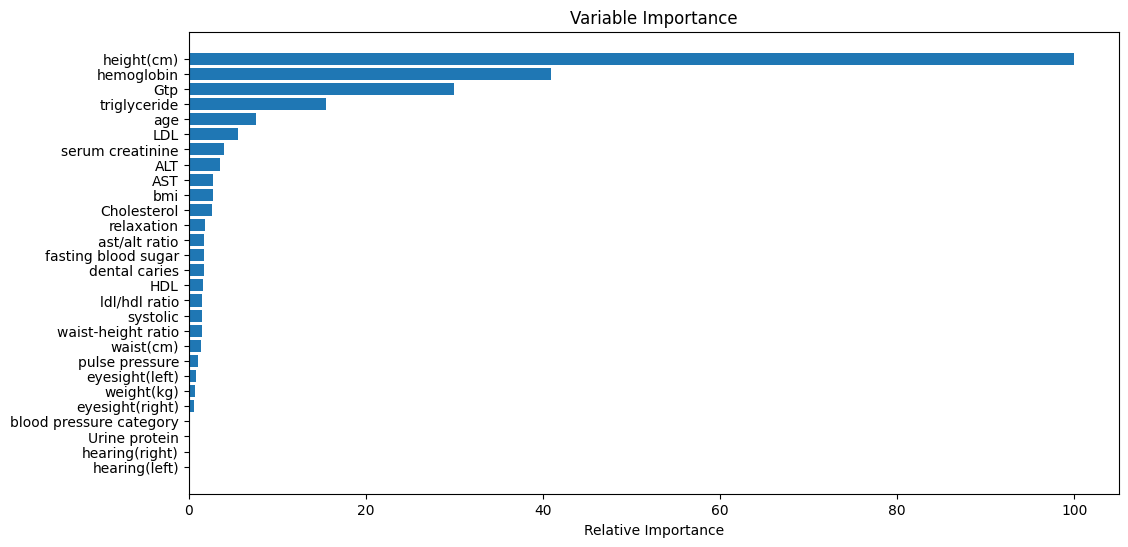

In [40]:
# feature importance graph

feature_importance = best_gbc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The top features make sense given the EDA. Those were features that seemed to accurately differentiate between classes

In [39]:
# predict 

predictions = best_gbc.predict(scaledval)

# submission

submission = pd.DataFrame({'id': val_id, 'smoking': predictions})
submission.to_csv('submission.csv', index=False)

submission.head(10) # got 0.78691 on kaggle

,id,smoking
0,159256,1
1,159257,0
2,159258,0
3,159259,0
4,159260,1
5,159261,1
6,159262,1
7,159263,0
8,159264,0
9,159265,0


## Hypertune Random Forests

In [41]:
# hypertune random forests 

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 4, 5],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

modelrf_tuned = RandomForestClassifier()

modelrf_cv = model_selection.GridSearchCV(modelrf_tuned, param_grid=param_grid, cv=small_cvsplit, scoring='roc_auc', n_jobs=-1, verbose=2)

modelrf_cv.fit(scaledxtrain, ytrain)

print(modelrf_cv.best_params_)
print(modelrf_cv.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
0.8363841096774124
